In [1]:
from transport_sqrb import Transport_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [2]:
# select parameters and build experiment

n_qubits = 8
seq_lengths = [6, 24]
seq_reps = 10
filename = 'exp_transport_SQRB_example.p'
qubit_length_groups = {
    0: 1,
    1: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 6,
    7: 6
}

exp = Transport_SQRB_Experiment(n_qubits, seq_lengths, seq_reps, qubit_length_groups, filename=filename)
exp.add_settings()

In [3]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [4]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/transport_sqrb.py:372: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/transport_sqrb.py:243: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


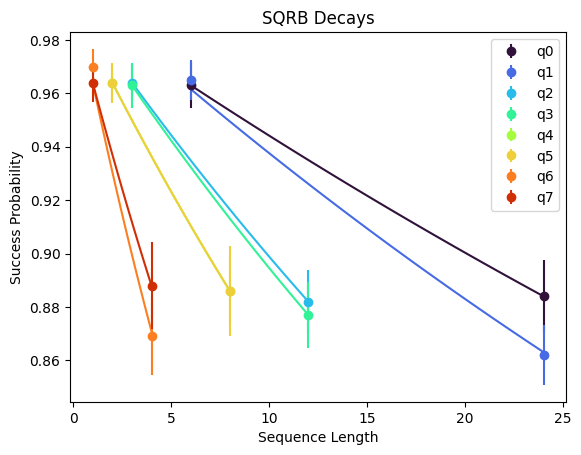

Average Fidelities
------------------------------
qubit 0: 0.99483 +/- 0.000954
qubit 1: 0.993379 +/- 0.000676
qubit 2: 0.989312 +/- 0.001695
qubit 3: 0.988714 +/- 0.001761
qubit 4: 0.984896 +/- 0.002685
qubit 5: 0.984896 +/- 0.003438
qubit 6: 0.964016 +/- 0.004744
qubit 7: 0.971058 +/- 0.006326
------------------------------
Qubit length 1 Average: 0.994104 +/- 0.000585
Qubit length 2 Average: 0.989013 +/- 0.001222
Qubit length 3 Average: 0.984896 +/- 0.002181
Qubit length 6 Average: 0.967537 +/- 0.003954


In [5]:
exp.analyze_results()

/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/transport_sqrb.py:272: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


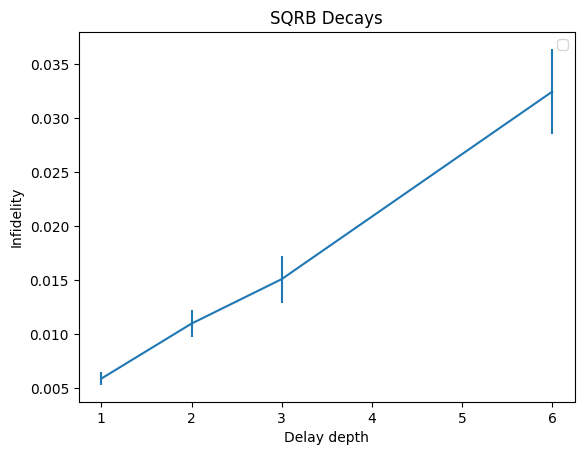

In [6]:
exp.plot_scaling()

In [7]:
# save experiment object to working directory

exp.save()